In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from infer import predict_diabetes

# Set seaborn & matplotlib style
sns.set_theme(style="whitegrid", palette="Spectral")
plt.style.use("seaborn-v0_8-darkgrid")

# ==============================
# 📌 Load Dataset
# ==============================
df = pd.read_csv("diabetes_data.csv")

print("✅ Dataset Loaded")
df.head()

✅ Dataset Loaded


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# Dataset shape & info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing values check
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics
df.describe()

Dataset Shape: (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


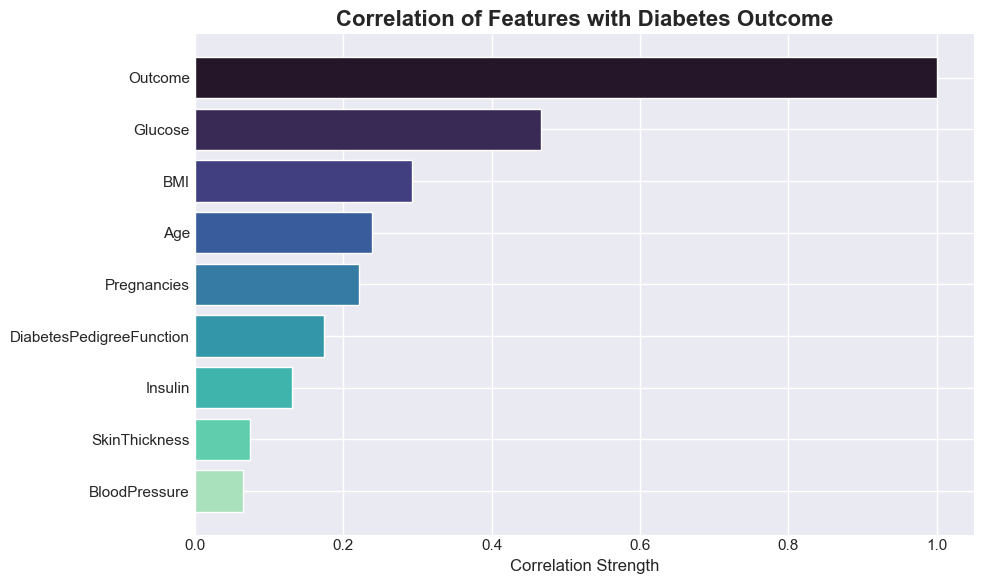

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with Outcome
outcome_corr = df.corr(numeric_only=True)["Outcome"].sort_values(ascending=False)

# Convert to DataFrame
corr_df = outcome_corr.reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Assign color manually (no palette/hue used)
bar_colors = sns.color_palette("mako", n_colors=len(corr_df))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(corr_df["Feature"], corr_df["Correlation"], color=bar_colors)
plt.title("Correlation of Features with Diabetes Outcome", fontsize=16, fontweight="bold")
plt.xlabel("Correlation Strength")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()



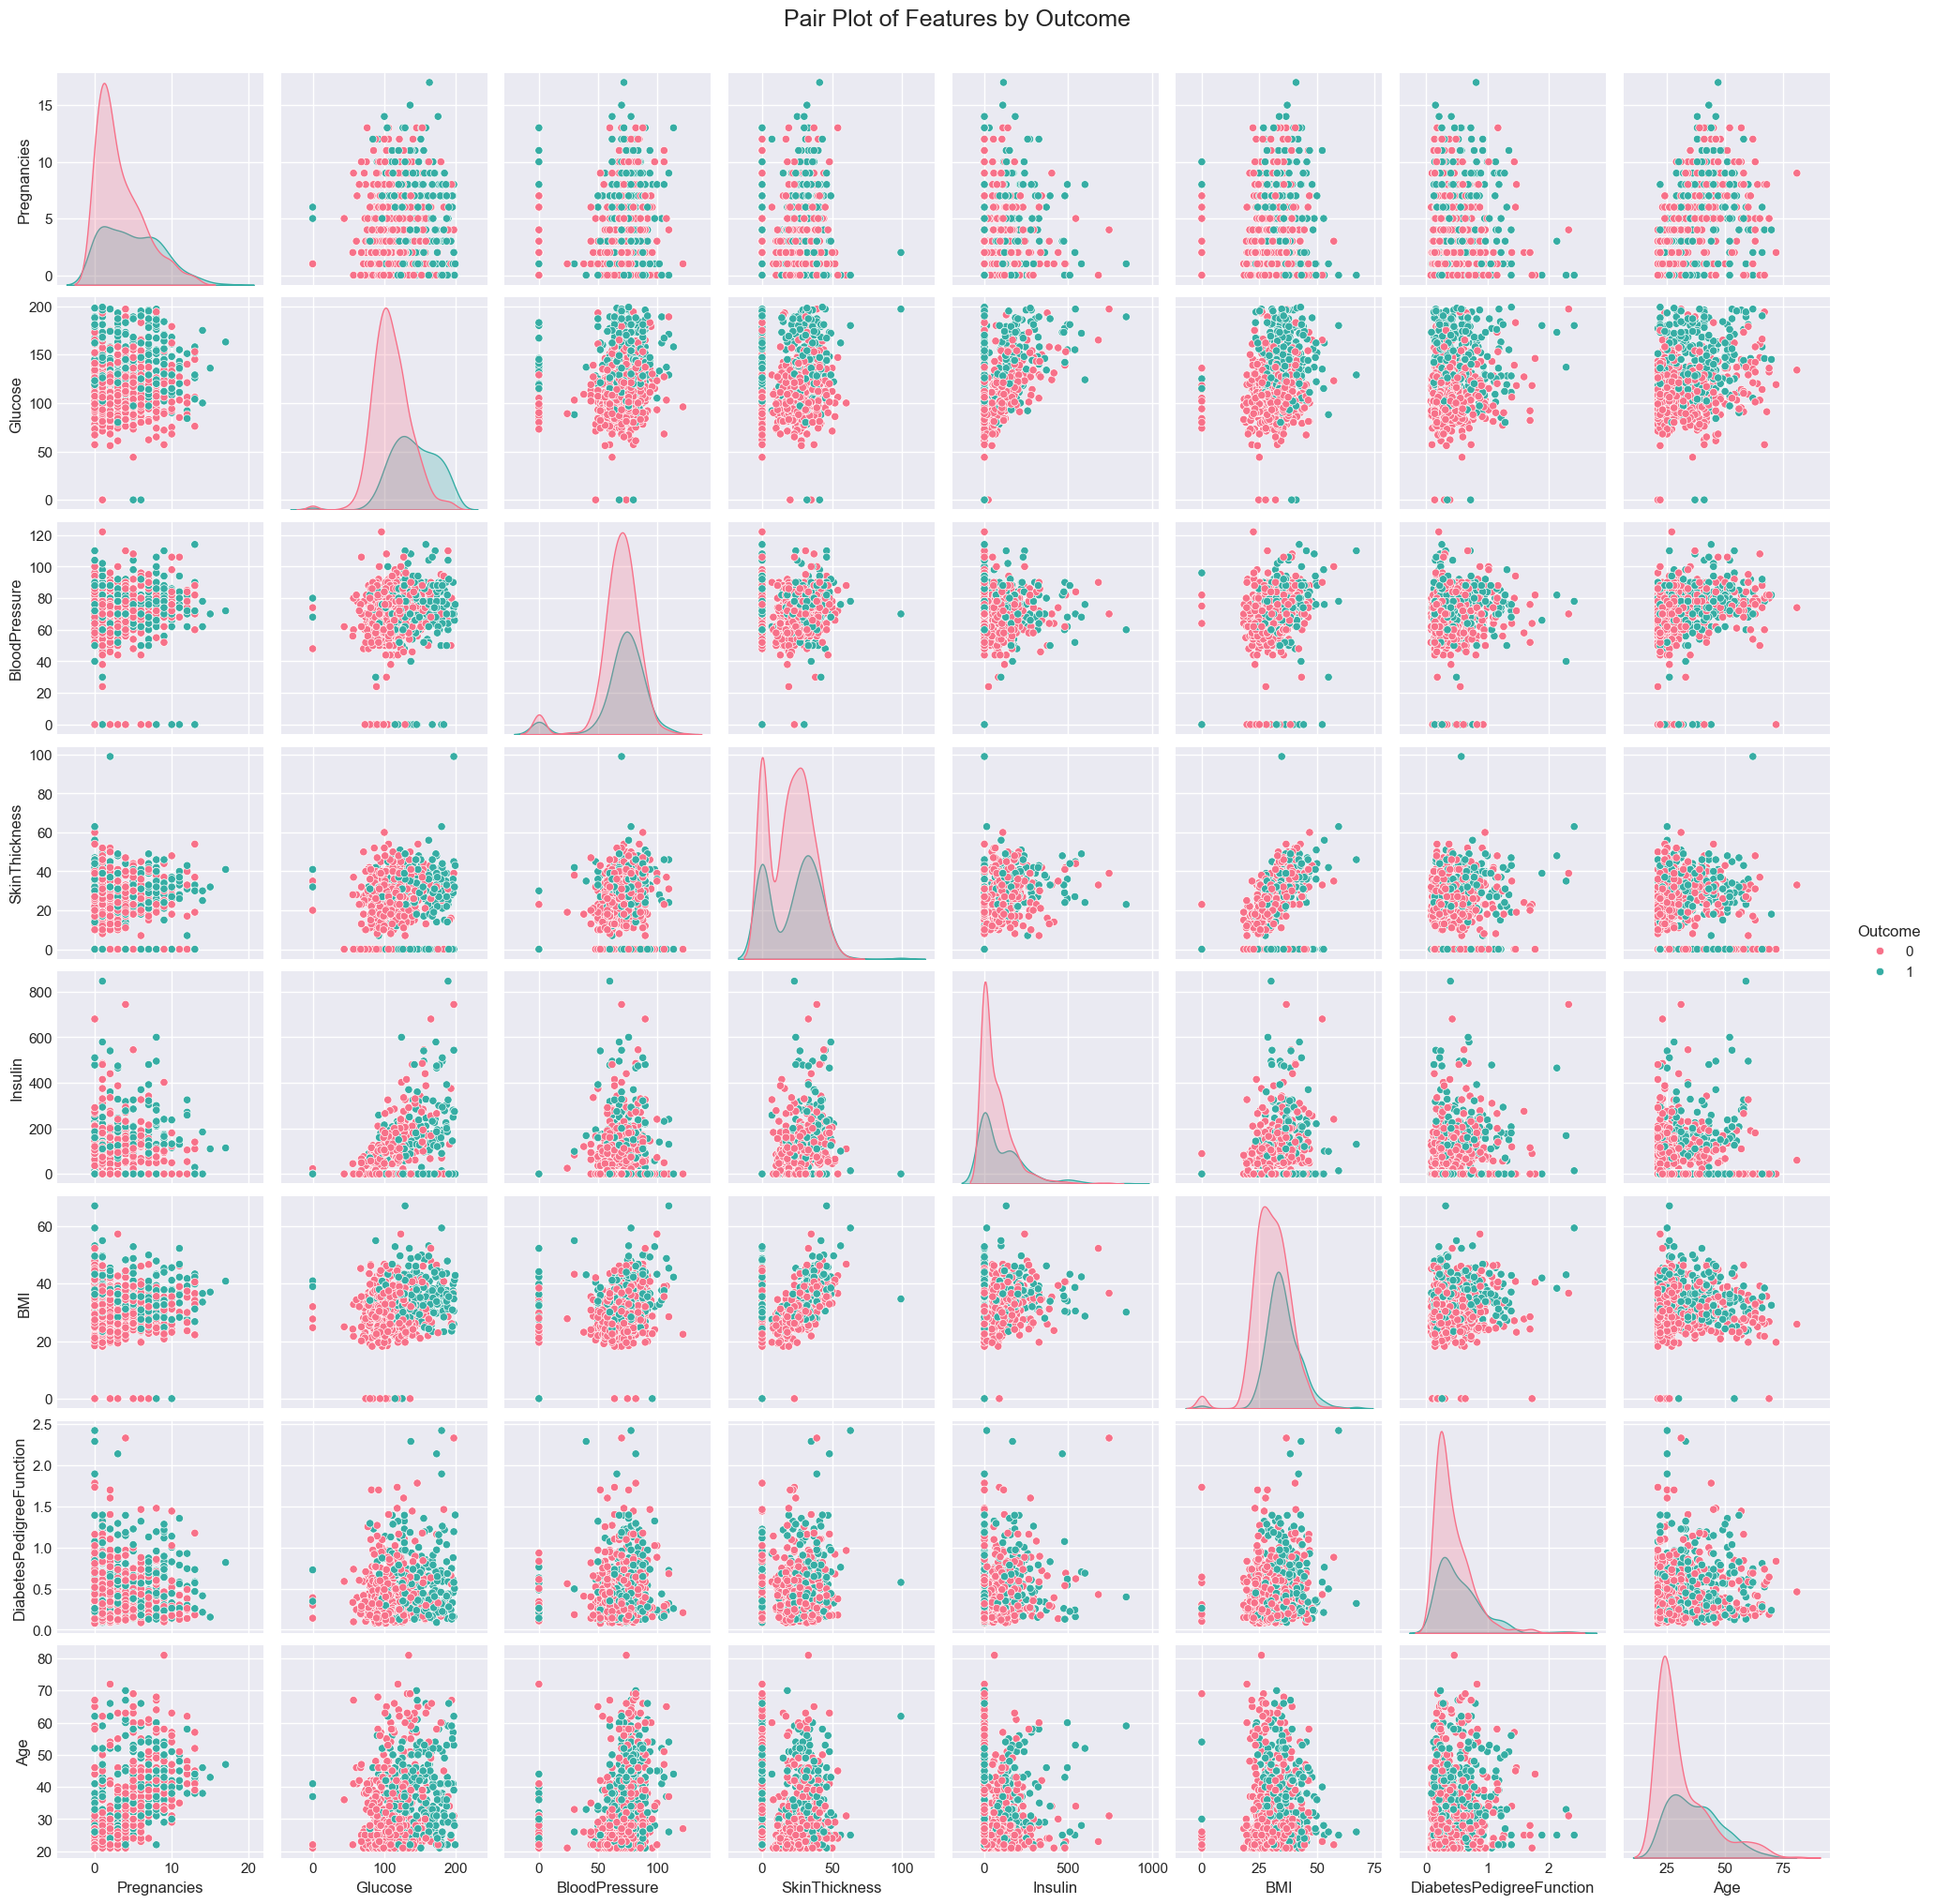

In [17]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="husl")
plt.suptitle("Pair Plot of Features by Outcome", y=1.02, fontsize=18)
plt.show()

# Interactive Scatter Plot
fig = px.scatter(df, x="Glucose", y="BMI", color="Outcome",
                 size="Age", hover_data=["Pregnancies"],
                 title="Glucose vs BMI (Outcome-Based)",
                 color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


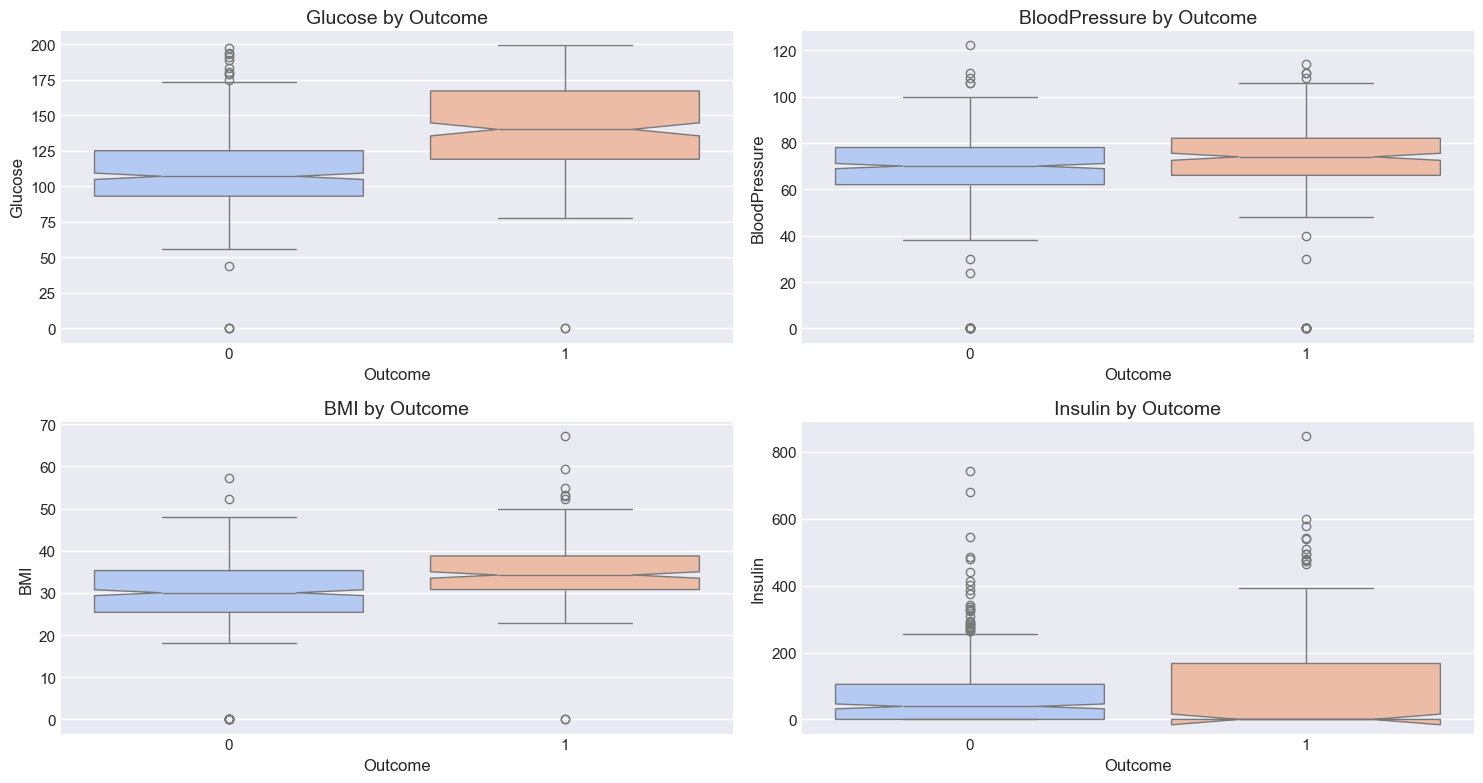

In [18]:
plt.figure(figsize=(15, 8))
for idx, col in enumerate(["Glucose", "BloodPressure", "BMI", "Insulin"], 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(x="Outcome", y=col, hue="Outcome", data=df,
                palette="coolwarm", notch=True, legend=False)
    plt.title(f"{col} by Outcome", fontsize=14)
    plt.xlabel("Outcome")
    plt.ylabel(col)
plt.tight_layout()
plt.show()


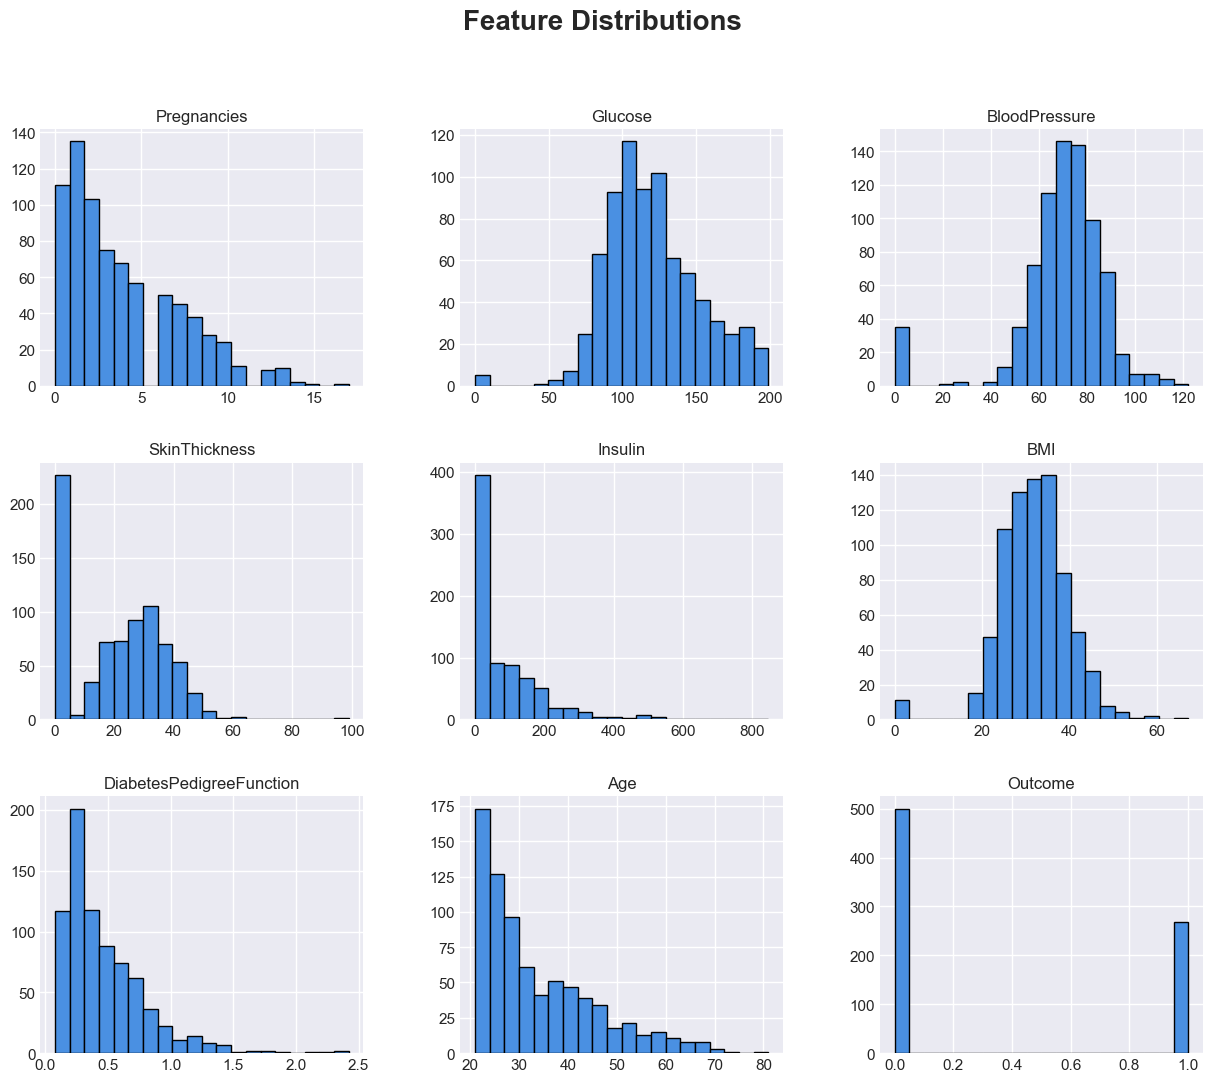

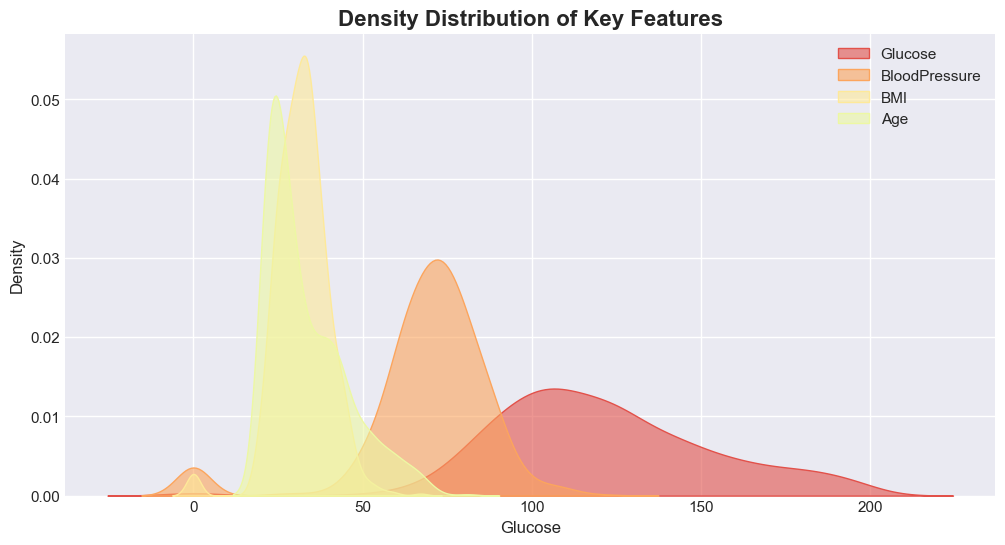

In [19]:
df.hist(figsize=(15,12), bins=20, color="#4a90e2", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=20, fontweight="bold")
plt.show()

# KDE density plots
plt.figure(figsize=(12,6))
for col in ["Glucose","BloodPressure","BMI","Age"]:
    sns.kdeplot(df[col], fill=True, label=col, alpha=0.6)
plt.legend()
plt.title("Density Distribution of Key Features", fontsize=16, fontweight="bold")
plt.show()


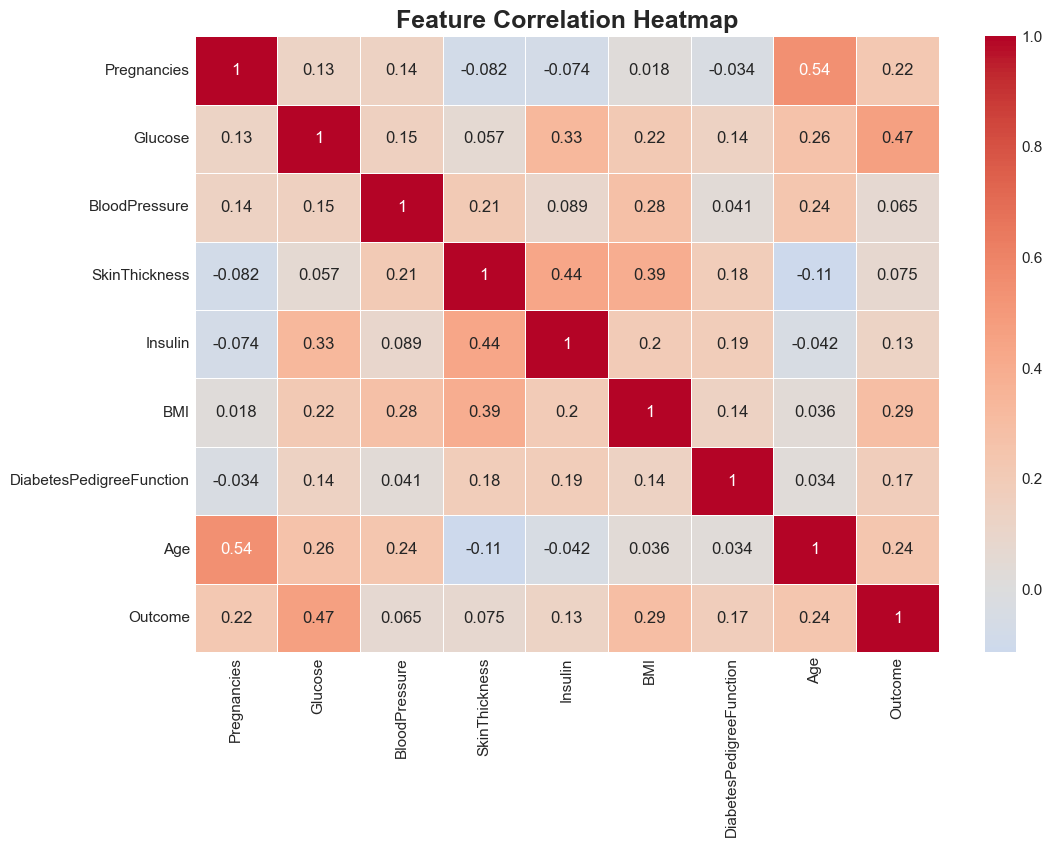

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Feature Correlation Heatmap", fontsize=18, fontweight="bold")
plt.show()


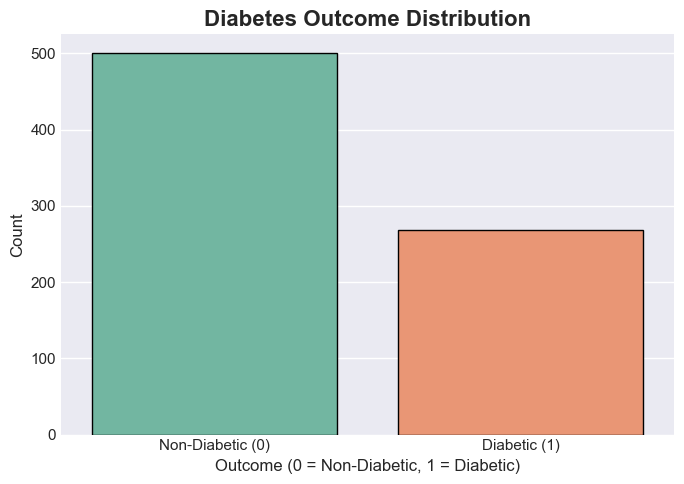

In [21]:
# Matplotlib & Seaborn Outcome Count Plot (Future-proof)
plt.figure(figsize=(7, 5))
sns.countplot(x="Outcome", hue="Outcome", data=df, palette="Set2", edgecolor="black", legend=False)
plt.title("Diabetes Outcome Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Diabetic (0)", "Diabetic (1)"])
plt.tight_layout()
plt.show()

# Plotly Pie Chart (Interactive)
fig = px.pie(df, 
             names="Outcome", 
             title="Diabetes Outcome Proportion (Interactive)",
             color="Outcome",
             color_discrete_map={0: "#66c2a5", 1: "#fc8d62"},
             hole=0.3)
fig.update_traces(textinfo='percent+label')
fig.update_layout(title_font_size=20)
fig.show()



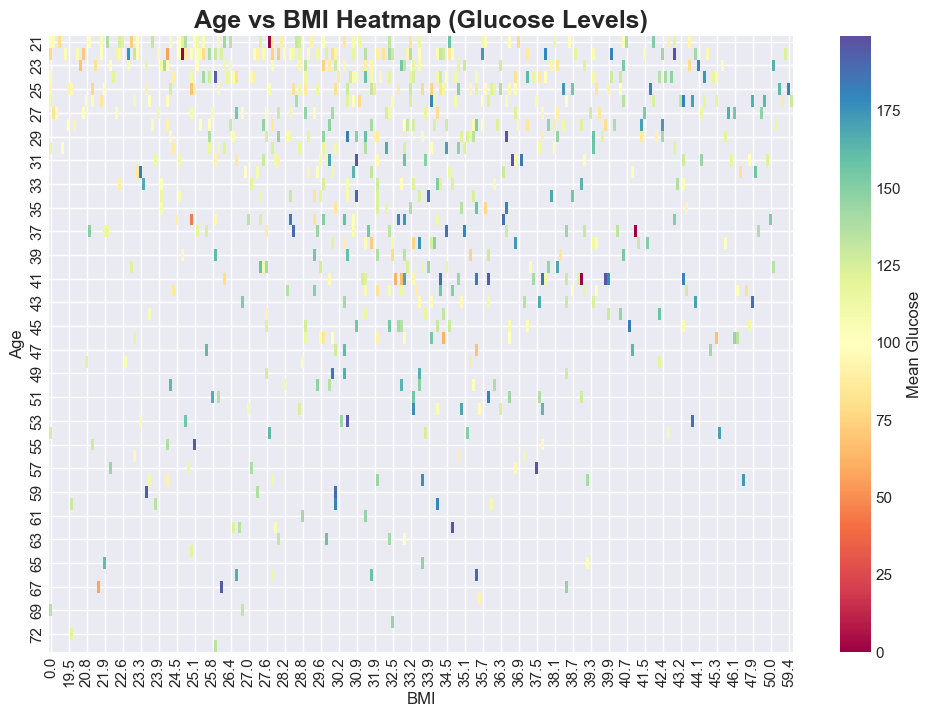

In [22]:
pivot_table = df.pivot_table(values="Glucose", index="Age", columns="BMI", aggfunc="mean")
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="Spectral", cbar_kws={'label': 'Mean Glucose'})
plt.title("Age vs BMI Heatmap (Glucose Levels)", fontsize=18, fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

In [23]:
# Example patient data: [Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age]
sample = [2, 120, 70, 30, 0, 25.0, 0.5, 28]
prediction = predict_diabetes(sample)

print("🔍 Patient Data:", sample)
print("✅ Prediction Result:", prediction)

🔍 Patient Data: [2, 120, 70, 30, 0, 25.0, 0.5, 28]
✅ Prediction Result: Non-Diabetic
